In [50]:
import pandas as pd
import numpy as np

In [82]:
A549_replicate5 = pd.read_csv("A549_directRNA_replicate5_run1.csv")
A549_replicate6 = pd.read_csv("A549_directRNA_replicate6_run1.csv")
Hct116_replicate3 = pd.read_csv("Hct116_directRNA_replicate3_run1.csv")
Hct116_replicate4 = pd.read_csv("Hct116_directRNA_replicate4_run3.csv")
HepG2_replicate5 = pd.read_csv("HepG2_directRNA_replicate5_run2.csv")
HepG2_replicate6 = pd.read_csv("HepG2_directRNA_replicate6_run1.csv")
K562_replicate4 = pd.read_csv("K562_directRNA_replicate4_run1.csv")
K562_replicate5 = pd.read_csv("K562_directRNA_replicate5_run1.csv")
K562_replicate6 = pd.read_csv("K562_directRNA_replicate6_run1.csv")
MCF7_replicate3 = pd.read_csv("MCF7_directRNA_replicate3_run1.csv")
MCF7_replicate4 = pd.read_csv("MCF7_directRNA_replicate4_run1.csv")

In [83]:
A549 = pd.merge(A549_replicate5, A549_replicate6, on=['transcript_id', 'transcript_position'], how='inner')
A549['average_score'] = (A549['probability_x'] + A549['probability_y']) / 2
A549['predict_label'] = A549['average_score'].apply(lambda x: 0 if x < 0.5 else 1)
A549 = A549.drop(['probability_x', 'probability_y'], axis=1)

In [84]:
Hct116 = pd.merge(Hct116_replicate3, Hct116_replicate4, on=['transcript_id', 'transcript_position'], how='inner')
Hct116['average_score'] = (Hct116['probability_x'] + Hct116['probability_y']) / 2
Hct116['predict_label'] = Hct116['average_score'].apply(lambda x: 0 if x < 0.5 else 1)
Hct116 = Hct116.drop(['probability_x', 'probability_y'], axis=1)

In [85]:
HepG2 = pd.merge(HepG2_replicate5, HepG2_replicate6, on=['transcript_id', 'transcript_position'], how='inner')
HepG2['average_score'] = (HepG2['probability_x'] + HepG2['probability_y']) / 2
HepG2['predict_label'] = HepG2['average_score'].apply(lambda x: 0 if x < 0.5 else 1)
HepG2 = HepG2.drop(['probability_x', 'probability_y'], axis=1)

In [86]:
MCF7 = pd.merge(MCF7_replicate3, MCF7_replicate3, on=['transcript_id', 'transcript_position'], how='inner')
MCF7['average_score'] = (MCF7['probability_x'] + MCF7['probability_y']) / 2
MCF7['predict_label'] = MCF7['average_score'].apply(lambda x: 0 if x < 0.5 else 1)
MCF7 = MCF7.drop(['probability_x', 'probability_y'], axis=1)

In [87]:
inner_merged_K562 = pd.merge(K562_replicate4, K562_replicate5, on=['transcript_id', 'transcript_position'], how='inner')
K562 = pd.merge(inner_merged_K562, K562_replicate6, on=['transcript_id', 'transcript_position'], how='inner')
K562['average_score'] = (K562['probability_x'] + K562['probability_y']+K562['probability']) / 2
K562['predict_label'] = K562['average_score'].apply(lambda x: 0 if x < 0.5 else 1)
K562 = K562.drop(['probability_x', 'probability_y', 'probability'], axis=1)

In [88]:
A549_count_1 = (A549['predict_label'] == 1).sum()
A549_percentage = ((A549_count_1)/ len(A549))* 100


In [89]:
Hct116_count_1 = (Hct116['predict_label'] == 1).sum()
Hct116_percentage = ((Hct116_count_1)/ len(Hct116))* 100
Hct116_percentage

13.56525087990163

In [90]:
HepG2_count_1 = (HepG2['predict_label'] == 1).sum()
HepG2_percentage = ((HepG2_count_1)/ len(HepG2))* 100
HepG2_percentage

14.888767438334009

In [91]:
MCF7_count_1 = (MCF7['predict_label'] == 1).sum()
MCF7_percentage = ((MCF7_count_1)/ len(MCF7))* 100
MCF7_percentage

10.096142715610599

In [92]:
K562_count_1 = (K562['predict_label'] == 1).sum()
K562_percentage = ((K562_count_1)/ len(K562))* 100
K562_percentage

21.244854662710992

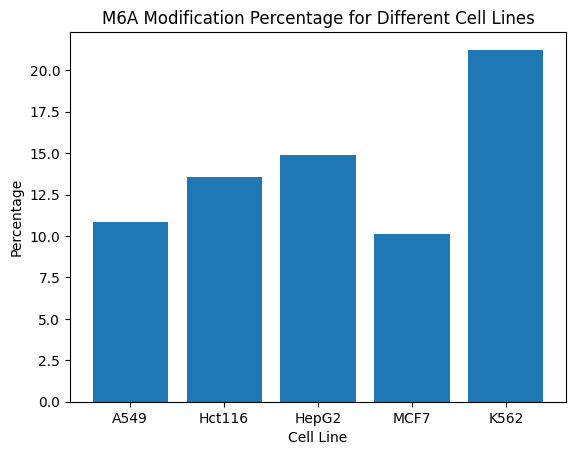

In [93]:
import matplotlib.pyplot as plt

cell_lines = ['A549', 'Hct116', 'HepG2', 'MCF7', 'K562']
percentages = [A549_percentage, Hct116_percentage, HepG2_percentage, MCF7_percentage, K562_percentage]

plt.bar(cell_lines, percentages)
plt.xlabel('Cell Line')
plt.ylabel('Percentage')
plt.title('M6A Modification Percentage for Different Cell Lines')
plt.show()


In [94]:
A549 = A549.drop(['predict_label'], axis=1)
Hct116 = Hct116.drop(['predict_label'], axis=1)
HepG2 = HepG2.drop(['predict_label'], axis=1)
MCF7 = MCF7.drop(['predict_label'], axis=1)
K562 = K562.drop(['predict_label'], axis=1)


In [124]:
merge1 = pd.merge(A549, Hct116, on=['transcript_id', 'transcript_position'], how='inner')
merge1['average_score'] = (merge1['average_score_x'] + merge1['average_score_y']) / 2
merge1 = merge1.drop(['average_score_x', 'average_score_y'], axis=1)
merge2 = pd.merge(merge1, HepG2, on=['transcript_id', 'transcript_position'], how='inner')
merge2['average_score'] = (merge2['average_score_x'] + merge2['average_score_y']) / 2
merge2 = merge2.drop(['average_score_x', 'average_score_y'], axis=1)
merge3 = pd.merge(merge2, K562, on=['transcript_id', 'transcript_position'], how='inner')
merge3['average_score'] = (merge3['average_score_x'] + merge3['average_score_y']) / 2
merge3 = merge3.drop(['average_score_x', 'average_score_y'], axis=1)
merge4 = pd.merge(merge3, MCF7, on=['transcript_id', 'transcript_position'], how='inner')


In [125]:
merge4.shape

(0, 4)

In [20]:
A549_replicate5['predict_label'] = A549_replicate5['probability'].apply(lambda x: 0 if x < 0.5 else 1)
A549_replicate6['predict_label'] = A549_replicate6['probability'].apply(lambda x: 0 if x < 0.5 else 1)
Hct116_replicate3['predict_label'] = Hct116_replicate3['probability'].apply(lambda x: 0 if x < 0.5 else 1)
Hct116_replicate4['predict_label'] = Hct116_replicate4['probability'].apply(lambda x: 0 if x < 0.5 else 1)
HepG2_replicate5['predict_label'] = HepG2_replicate5['probability'].apply(lambda x: 0 if x < 0.5 else 1)
HepG2_replicate6['predict_label'] = HepG2_replicate6['probability'].apply(lambda x: 0 if x < 0.5 else 1)
K562_replicate4['predict_label'] = K562_replicate4['probability'].apply(lambda x: 0 if x < 0.5 else 1)
K562_replicate5['predict_label'] = K562_replicate5['probability'].apply(lambda x: 0 if x < 0.5 else 1)
K562_replicate6['predict_label'] = K562_replicate6['probability'].apply(lambda x: 0 if x < 0.5 else 1)
MCF7_replicate3['predict_label'] = MCF7_replicate3['probability'].apply(lambda x: 0 if x < 0.5 else 1)
MCF7_replicate4['predict_label'] = MCF7_replicate4['probability'].apply(lambda x: 0 if x < 0.5 else 1)

In [9]:
merged_data = pd.read_csv("merged_data.csv")

In [11]:
merged_data.head()

,transcript_id,transcript_position,sequence,avg_1-flank_length,avg_1-flank_std,avg_1-flank_mean,avg_central_length,avg_central_std,avg_central_mean,avg_1+flank_length,...,std_1-flank_std,std_1-flank_mean,std_central_length,std_central_std,std_central_mean,std_1+flank_length,std_1+flank_std,std_1+flank_mean,gene_id,label
0,ENST00000000233,244,AAGACCA,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,...,1.843025,4.944365,0.005364,3.302671,2.765244,0.004566,2.906225,2.522168,ENSG00000004059,0
1,ENST00000000233,261,CAAACTG,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,...,1.689167,2.981182,0.003767,1.237045,3.526528,0.004528,1.466295,2.492530,ENSG00000004059,0
2,ENST00000000233,316,GAAACAG,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,...,1.311103,1.492577,0.005035,0.893481,3.203816,0.004497,0.800496,1.484341,ENSG00000004059,0
3,ENST00000000233,332,AGAACAT,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006102,...,2.459317,3.202963,0.004612,1.393868,1.928009,0.003595,0.741771,3.494937,ENSG00000004059,0
4,ENST00000000233,368,AGGACAA,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,...,2.743228,2.664643,0.005407,1.753894,2.177236,0.005908,1.341822,2.379045,ENSG00000004059,0
